# 𝐺𝑅𝐼𝑃: 𝑇𝐻𝐸 𝑆𝑃𝐴𝑅𝐾 𝐹𝑂𝑈𝑁𝐷𝐴𝑇𝐼𝑂𝑁 

### Data Science and Business Analylits Internship

#### Author: Suman Ghosh

### Task 3 : Exploratory Data Analysis - Retail on datset SampleSuperstore.

#####  source of data : https://bit.ly/3i4rbWl

You are the business owner of the retail firm and want to see how your company is performing. You are interested in finding out the weak areas where you can work to make more profit.
What all business problems you can derive by looking into the data?

### Importing Libraries
At first we will import different libraries for importing ,visulizating and analyzing of our dataset.

In [4]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns

### Importing Dataset

In [7]:
data = pd.read_csv(r'F:\internship_spark_foundation\Assignment_3\SampleSuperstore_data.csv')
data

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


###  Description of our data

In [8]:
#cheeking shape of the data
data.shape

(9994, 13)

In [9]:
#information of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
Ship Mode       9994 non-null object
Segment         9994 non-null object
Country         9994 non-null object
City            9994 non-null object
State           9994 non-null object
Postal Code     9994 non-null int64
Region          9994 non-null object
Category        9994 non-null object
Sub-Category    9994 non-null object
Sales           9994 non-null float64
Quantity        9994 non-null int64
Discount        9994 non-null float64
Profit          9994 non-null float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [10]:
#cheek missing values
data.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [11]:
#calculate summary of statistics
data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [12]:
#Let's check if the dataset contains duplicate rows.
data.duplicated().sum()

17

We see that our dataset has 17 duplicated rows. Let's delete them.

In [13]:
data.drop_duplicates(keep = 'first', inplace = True)
data.shape

(9977, 13)

We can see that the column Country has only one value. Therefore, let's get rid of this column.

In [14]:
data.drop(columns = 'Country', inplace = True)
data

,Ship Mode,Segment,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


In [15]:
# print first five rows
data.head()

,Ship Mode,Segment,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [17]:
#print last five rows
data.tail()

,Ship Mode,Segment,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
9989,Second Class,Consumer,Miami,Florida,33180,South,Furniture,Furnishings,25.248,3,0.2,4.1028
9990,Standard Class,Consumer,Costa Mesa,California,92627,West,Furniture,Furnishings,91.960,2,0.0,15.6332
9991,Standard Class,Consumer,Costa Mesa,California,92627,West,Technology,Phones,258.576,2,0.2,19.3932
9992,Standard Class,Consumer,Costa Mesa,California,92627,West,Office Supplies,Paper,29.600,4,0.0,13.3200
9993,Second Class,Consumer,Westminster,California,92683,West,Office Supplies,Appliances,243.160,2,0.0,72.9480


### Exploratory Data Analysis and visulizing of Data
Now, let's visualise the count plot and Bar Plots for Sales and Profit for the columns: Ship Mode, Segment, Region, and Category.

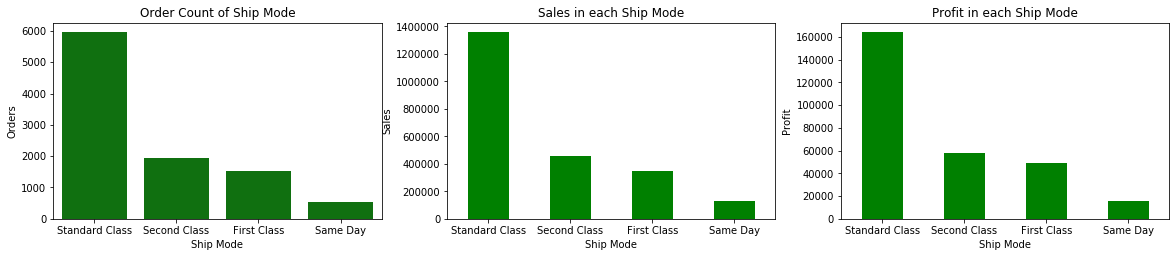

In [58]:
f, ax = plt.subplots(1, 3, figsize=(20,4))

sns.countplot(data['Ship Mode'], color = 'green', order = data['Ship Mode'].value_counts().index, ax=ax[0])
ax[0].title.set_text("Order Count of Ship Mode")
ax[0].set_xlabel("Ship Mode")
ax[0].set_ylabel("Orders")


ship_sale_profit = data.groupby('Ship Mode')[['Sales', 'Profit']].sum()

ship_sale_profit.sort_values(['Sales'], axis = 0, ascending = False, inplace = True) 
ship_sale_profit.plot(y='Sales', kind = "bar", color = 'green', ax=ax[1])

ax[1].title.set_text('Sales in each Ship Mode')
ax[1].set_xlabel('Ship Mode')
ax[1].set_ylabel('Sales')
ax[1].get_legend().remove()


ship_sale_profit.sort_values(['Profit'], axis = 0, ascending = False, inplace = True) 
ship_sale_profit.plot(y='Profit', kind = "bar", color = 'green', ax=ax[2])

ax[2].title.set_text('Profit in each Ship Mode')
ax[2].set_xlabel('Ship Mode')
ax[2].set_ylabel('Profit')
ax[2].get_legend().remove()

f.autofmt_xdate(rotation=0, ha='center')
plt.show()


We observe that Standard Class is the most popular shipping mode and Same Day is the least popular. Because Standard Class has the most shipments and it is a cheap shipping mode, it makes sense for it to be the most profitable.

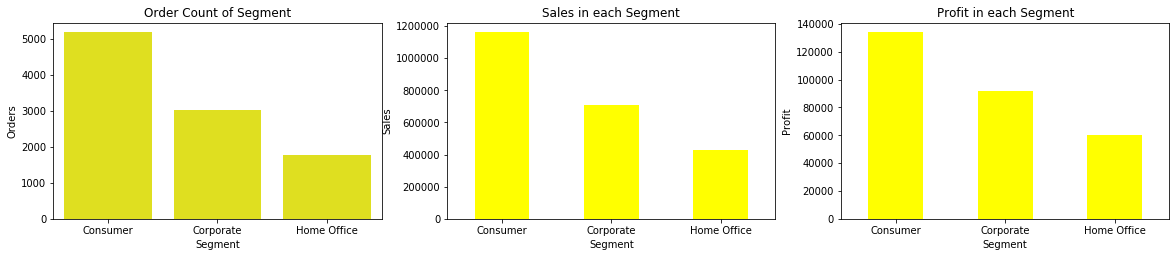

In [59]:
f, ax = plt.subplots(1, 3, figsize=(20,4))

sns.countplot(data['Segment'], color = 'yellow', order = data['Segment'].value_counts().index, ax=ax[0])
ax[0].title.set_text("Order Count of Segment")
ax[0].set_xlabel("Segment")
ax[0].set_ylabel("Orders")


segment_sale_profit = data.groupby('Segment')[['Sales', 'Profit']].sum()

segment_sale_profit.sort_values(['Sales'], axis = 0, ascending = False, inplace = True) 
segment_sale_profit.plot(y='Sales', kind = "bar", color = 'yellow', ax=ax[1])

ax[1].title.set_text('Sales in each Segment')
ax[1].set_xlabel('Segment')
ax[1].set_ylabel('Sales')
ax[1].get_legend().remove()


segment_sale_profit.sort_values(['Profit'], axis = 0, ascending = False, inplace = True) 
segment_sale_profit.plot(y='Profit', kind = "bar", color = 'yellow', ax=ax[2])

ax[2].title.set_text('Profit in each Segment')
ax[2].set_xlabel('Segment')
ax[2].set_ylabel('Profit')
ax[2].get_legend().remove()

f.autofmt_xdate(rotation=0, ha='center')
plt.show()

We observe that Consumer is the major segment, while Home Office contributes the least.

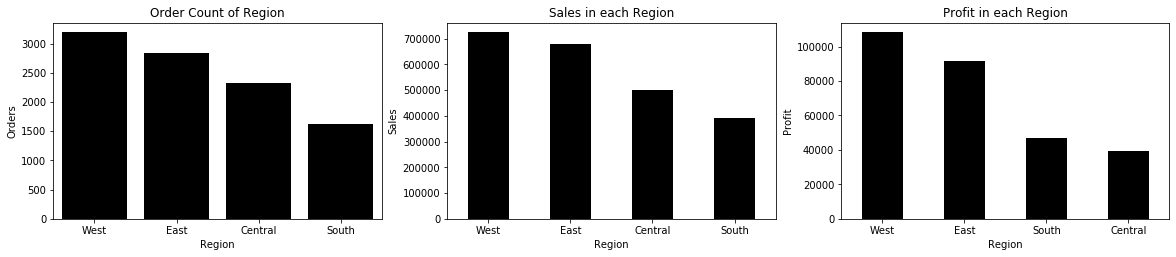

In [60]:
f, ax = plt.subplots(1, 3, figsize=(20,4))

sns.countplot(data['Region'], color = 'black', order = data['Region'].value_counts().index, ax=ax[0])
ax[0].title.set_text("Order Count of Region")
ax[0].set_xlabel("Region")
ax[0].set_ylabel("Orders")


region_sale_profit = data.groupby('Region')[['Sales', 'Profit']].sum()

region_sale_profit.sort_values(['Sales'], axis = 0, ascending = False, inplace = True) 
region_sale_profit.plot(y='Sales', kind = "bar", color = 'black', ax=ax[1])

ax[1].title.set_text('Sales in each Region')
ax[1].set_xlabel('Region')
ax[1].set_ylabel('Sales')
ax[1].get_legend().remove()


region_sale_profit.sort_values(['Profit'], axis = 0, ascending = False, inplace = True) 
region_sale_profit.plot(y='Profit', kind = "bar", color = 'black', ax=ax[2])

ax[2].title.set_text('Profit in each Region')
ax[2].set_xlabel('Region')
ax[2].set_ylabel('Profit')
ax[2].get_legend().remove()

f.autofmt_xdate(rotation=0, ha='center')
plt.show()

We observe that West consists of most buyers while South consists of the least. Central region is the least profitable.

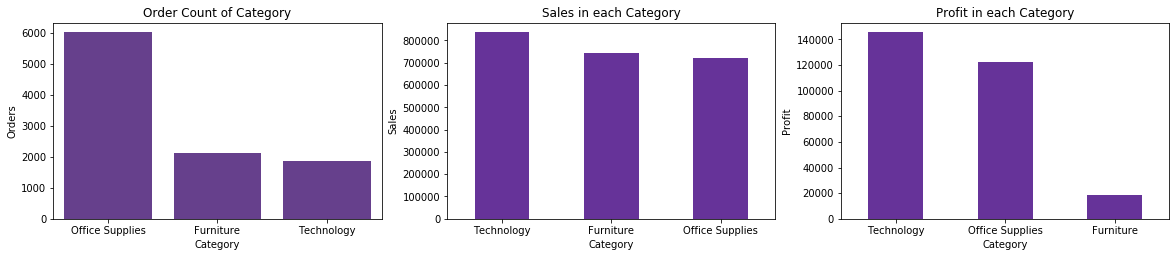

In [61]:
f, ax = plt.subplots(1, 3, figsize=(20,4))

sns.countplot(data['Category'], color = 'rebeccapurple', order = data['Category'].value_counts().index, ax=ax[0])
ax[0].title.set_text("Order Count of Category")
ax[0].set_xlabel("Category")
ax[0].set_ylabel("Orders")


category_sale_profit = data.groupby('Category')[['Sales', 'Profit']].sum()

category_sale_profit.sort_values(['Sales'], axis = 0, ascending = False, inplace = True) 
category_sale_profit.plot(y='Sales', kind = "bar", color = 'rebeccapurple', ax=ax[1])

ax[1].title.set_text('Sales in each Category')
ax[1].set_xlabel('Category')
ax[1].set_ylabel('Sales')
ax[1].get_legend().remove()


category_sale_profit.sort_values(['Profit'], axis = 0, ascending = False, inplace = True)
category_sale_profit.plot(y='Profit', kind = "bar", color = 'rebeccapurple', ax=ax[2])

ax[2].title.set_text('Profit in each Category')
ax[2].set_xlabel('Category')
ax[2].set_ylabel('Profit')
ax[2].get_legend().remove()

f.autofmt_xdate(rotation=0, ha='center')
plt.show()

We observe that the frequency of purchases in the Office Supplies category is significantly large as compared to Technology and Furniture. However, the sales amount for Technology is the highest, which makes sense because technological equipments are expensive, thus resulting in a larger sales despite a lower frequency of purchase. When we observe the Profit graph, we can see that Technology brings in the highest profit. But, the profit brought in by Furniture is very low considering that it has the second-highest sales, only a little different from Office Supplies. But, Office Supplies results in good profit.

Now, let's visualise the count plot for State.

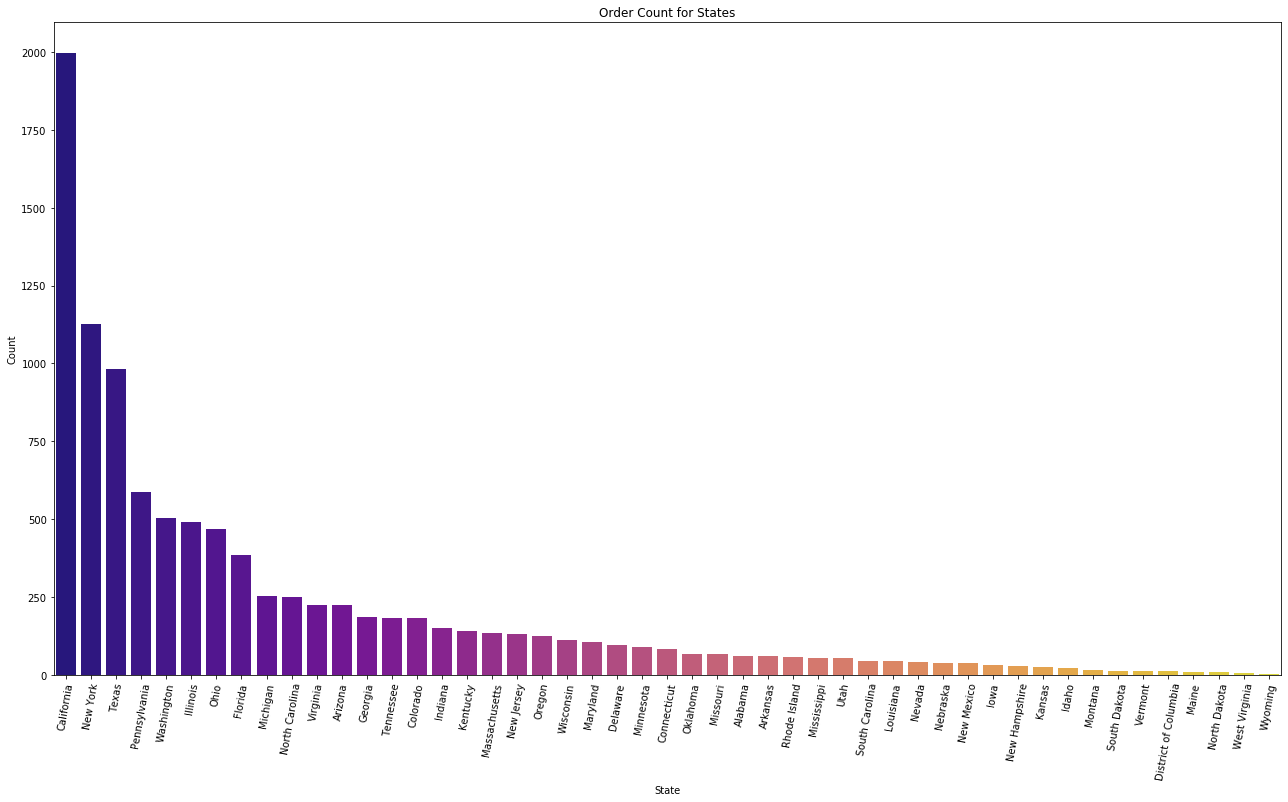

In [38]:
plt.figure(figsize=(22,12))
sns.countplot(data['State'], order = data['State'].value_counts().index, palette = 'plasma')

plt.title("Order Count for States")
plt.xticks(rotation=80)
plt.xlabel("State")
plt.ylabel("Count")
plt.show()

We observe that California has the highest buyers, almost double New York, which has the second-highest buyers. Wyoming has the least buyers.

Let's check out the sales and profit for each state with the help of a double bar graph.

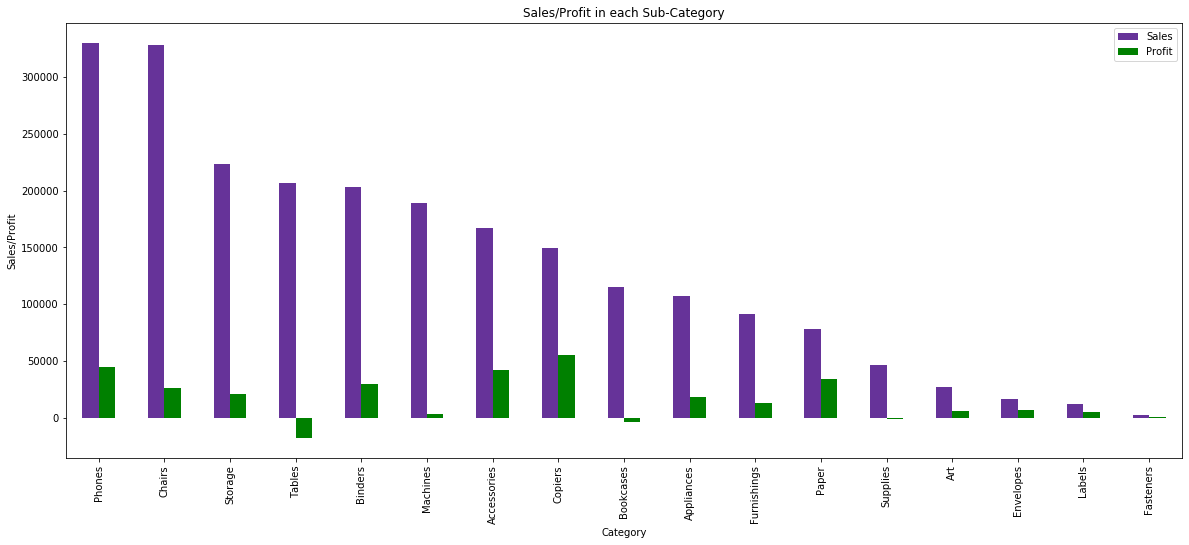

In [43]:
subcategory_sale_profit = data.groupby('Sub-Category')[['Sales', 'Profit']].sum()
subcategory_sale_profit.sort_values('Sales', ascending = False, inplace=True)
subcategory_sale_profit.plot(kind = "bar",color = ["rebeccapurple","green"], figsize = (20,8))

plt.title('Sales/Profit in each Sub-Category')
plt.xlabel('Category')
plt.ylabel('Sales/Profit')
plt.show()


In [44]:
cat_sub_cat = data.groupby(['Category','Sub-Category'])[['Sales','Profit']].sum().reset_index()
cat_sub_cat

,Category,Sub-Category,Sales,Profit
0,Furniture,Bookcases,114879.9963,-3472.5560
1,Furniture,Chairs,327777.7610,26567.1278
2,Furniture,Furnishings,91683.0240,13052.7230
3,Furniture,Tables,206965.5320,-17725.4811
4,Office Supplies,Appliances,107532.1610,18138.0054
5,Office Supplies,Art,27107.0320,6524.6118
6,Office Supplies,Binders,203409.1690,30228.0003
7,Office Supplies,Envelopes,16476.4020,6964.1767
8,Office Supplies,Fasteners,3024.2800,949.5182
9,Office Supplies,Labels,12444.9120,5526.3820



We can see that while the sales for tables is the fourth-highest, it still undergoes the highest overall loss. Bookcases also witness a loss. Supplies witness the least loss. The profit incurred for machines is low.

Let's now observe the sales and profit of each sub-category separated by segment.

In [46]:
sub_seg = data.groupby(['Sub-Category', 'Segment'])[['Quantity','Sales','Profit']].sum().reset_index()
sub_seg

,Sub-Category,Segment,Quantity,Sales,Profit
0,Accessories,Consumer,1578,87105.2380,20735.9225
1,Accessories,Corporate,881,48190.5640,12707.4805
2,Accessories,Home Office,517,32084.5160,8493.2327
3,Appliances,Consumer,908,52819.5810,6981.9282
4,Appliances,Corporate,569,36588.6830,7429.8952
5,Appliances,Home Office,252,18123.8970,3726.1820
6,Art,Consumer,1625,14251.9300,3454.3011
7,Art,Corporate,846,8578.6880,2001.4725
8,Art,Home Office,525,4276.4140,1068.8382
9,Binders,Consumer,3015,118161.0090,17995.5972


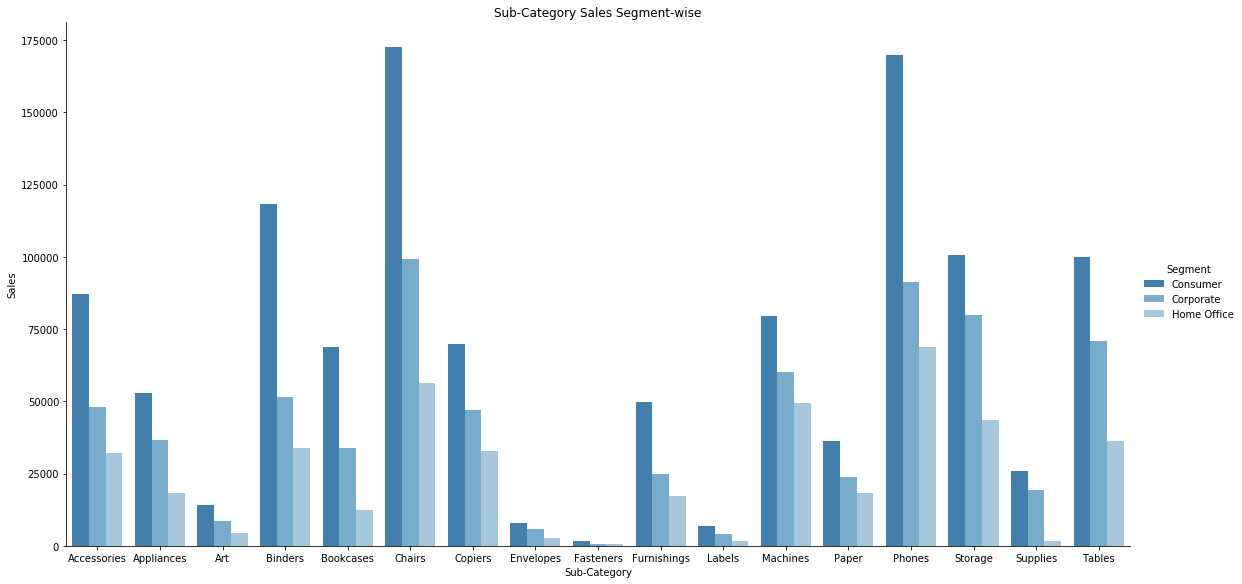

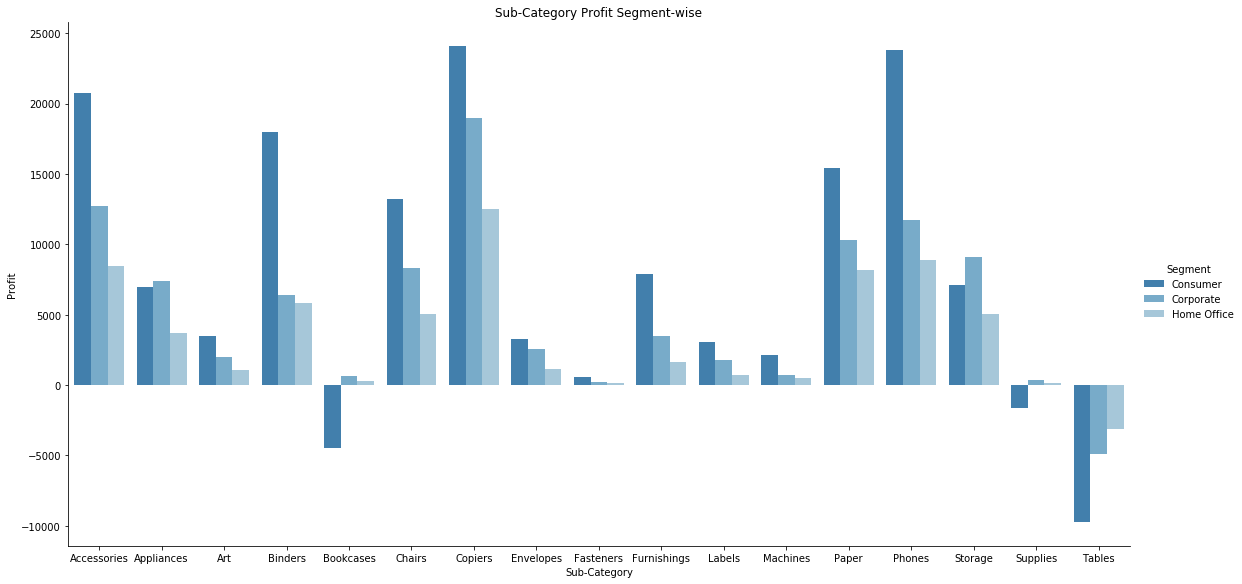

In [47]:
sns.catplot('Sub-Category', y='Sales', hue = 'Segment', data = sub_seg, kind='bar',palette='tab20c',aspect=2,height=8)
plt.title('Sub-Category Sales Segment-wise')
sns.catplot('Sub-Category', y='Profit', hue = 'Segment',data = sub_seg, kind='bar',palette='tab20c',aspect=2,height=8)
plt.title('Sub-Category Profit Segment-wise')
plt.show()

Let's plot a scatter plot for Discount vs. Profit.

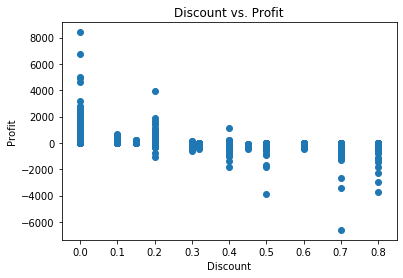

In [50]:
plt.scatter(data['Discount'], data['Profit'])
plt.title('Discount vs. Profit')
plt.xlabel('Discount')
plt.ylabel('Profit')
plt.show()

We can observe that more the dicsount, lesser the profit.

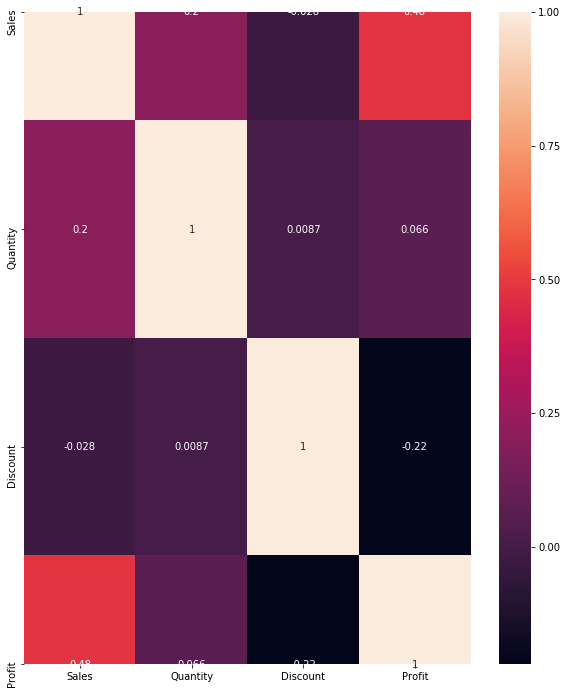

In [53]:
data_for_corr = data[['Sales','Quantity','Discount','Profit']]
plt.figure(figsize=(10,12))
cm = data_for_corr.corr()
sns.heatmap(cm,annot=True)
plt.show()

We can observe that Sales and Profit have a positive correlation, and so do Sales and Quantity to an extent. We can also observe that Profit and Discount have a negative correlation, and so do Sales and Discount to an extent.

In [54]:
np.mean(data['Profit'])

28.69012955798349

here,we see that  average profit of the firm is 28.69, which is low. But, hey, atleast the firm is not operating at a loss.


### Inferences

3) The Western region has the most sales and profit. However, the Central region has the least profit, and the Southern region has the least sales. \ 4) Office Supplies has the highest frequency of purchases. Technology has the most sales and is the most profitable. Furniture has the least profit although it has the second-highest sales. \ 5) Within Furniture, Tables in all segments undergoes heavy losses, and Tables also accounts for the highest loss amongst any other product. Bookcases in the Consumer segment witnesses losses. \ 6) In Office Supplies, Supplies undergoes a loss in the Consumer Segment. \ 7) In Office Supplies, Appliances has more sales in the Consumer segment than in the other segments. But the profit from Corporate segment is higher than that from Consumer segment. \ 8) In technology, although Machines have a pretty decent sales, the resultant profit is low. However, copiers and accessories compensate for that. \ 9) Out of the top 10 states with the highest sales, 5 undergo an overall loss. \ 10) Texas, which has the third-highest sales, witnesses the highest loss. \ 11) The profit for both California and New York is more or less the same. But California has the highest sales, and New York the second highest. Therefore, we can say that for the same amount of sales, New York is more profitable. \ 12) A general observation is that more the sales, more the profit. 

## Thank you